In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#ens_train=pd.read_csv('ens_train_final.csv',index_col='Unnamed: 0')
#ens_val=pd.read_csv('ens_val_final.csv',index_col='Unnamed: 0')
#ens_test=pd.read_csv('ens_test_final.csv',index_col='Unnamed: 0')

In [5]:
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())


def change_season(match):
    if match['season'] =='2008/2009':
        return 0
    elif match['season'] =='2009/2010':
        return 1
    elif match['season'] =='2010/2011':
        return 2
    elif match['season'] =='2011/2012':
        return 3
    elif match['season'] =='2012/2013':
        return 4
    elif match['season'] =='2013/2014':
        return 5
    elif match['season'] =='2014/2015':
        return 6
    else:
        return 7
    
#Classifing Match output
def determine_home_result(match):
    if match['home_team_goal'] > match['away_team_goal']:
        return 1
    elif match['home_team_goal'] < match['away_team_goal']:
        return 2
    else:
        return 0
    
    

out = 'Output'

featured = pd.read_csv('dados2.csv')
featured['Output']=featured.apply(determine_home_result, axis=1)
featured['season']=featured.apply(change_season, axis=1) 

featured= featured.dropna()



from sklearn.metrics import log_loss

train_value = 4
val_value = 5
test_value = 6

train = featured[featured['season']<=train_value]
val = featured[featured['season']==val_value]
test = featured[featured['season']>=test_value]

In [6]:
tot = featured[out].value_counts()
#tot =  (v*1./np.sum(tot)) for v in tot
total=[]
for v in tot:
    total.append((v*1./np.sum(tot)))
print total
print "Train"
tot_train=[]
for v in train[out].value_counts():
    tot_train.append((v*1./np.sum(train[out].value_counts())))
print tot_train
print "Val"
tot_val=[]
for v in val[out].value_counts():
    tot_val.append((v*1./np.sum(val[out].value_counts())))
print tot_val
print "Test"
tot_test=[]
for v in test[out].value_counts():
    tot_test.append((v*1./np.sum(test[out].value_counts())))
print tot_test


[0.46548467678060074, 0.28251995369524158, 0.25199536952415769]
Train
[0.47051597051597049, 0.27837837837837837, 0.25110565110565108]
Val
[0.45597334602570205, 0.2903379343169919, 0.25368871965730605]
Test
[0.44576593720266411, 0.29876308277830638, 0.25547098001902951]


In [7]:
import pickle
f = open('lda_gb.pckl', 'rb')
gb_lda = pickle.load(f)
f.close()
f = open('lda_nb.pckl', 'rb')
nb_lda = pickle.load(f)
f.close()
f = open('rf_lda_sf.pckl', 'rb')
rf_lda_sf = pickle.load(f)
f.close()
f = open('rf_lda_f.pckl', 'rb')
rf_lda_f = pickle.load(f)
f.close()
f = open('nb_lda_eq.pckl', 'rb')
nb_lda_eq = pickle.load(f)
f.close()

In [6]:
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(train[ft],train[out]).transform(train[ft])

lda_train = lda.transform(train[ft])
lda_val = lda.transform(val[ft])
lda_test = lda.transform(test[ft])

#data = pysql("Select * from data where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")

sf_data = pysql("Select * from featured where B365H<= 1.5 or B365A<=1.5")
f_data = pysql("Select * from featured where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
eq_data = pysql("Select * from featured where B365H>=2.22 and B365A>=2.22")

train=featured[featured['season']<=5]
val=featured[featured['season']==6]
test=featured[featured['season']==7]


sf_train=sf_data[sf_data['season']<=5]
sf_val=sf_data[sf_data['season']==6]
sf_test=sf_data[sf_data['season']==7]

f_train=f_data[f_data['season']<=5]
f_val=f_data[f_data['season']==6]
f_test=f_data[f_data['season']==7]

eq_train=eq_data[eq_data['season']<=5]
eq_val=eq_data[eq_data['season']==6]
eq_test=eq_data[eq_data['season']==7]

def lda_filter(data,train,val,test):
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(data[ft],data[out]).transform(data[ft])
    lda_train = lda.transform(train[ft])
    lda_val = lda.transform(val[ft])
    lda_test = lda.transform(test[ft])
    return lda,lda_train,lda_val,lda_test

sf_lda,sf_train_lda,sf_val_lda,sf_test_lda = lda_filter(sf_data,sf_train,sf_val,sf_test)
f_lda,f_train_lda,f_val_lda,f_test_lda = lda_filter(f_data,f_train,f_val,f_test)
eq_lda,eq_train_lda,eq_val_lda,eq_test_lda = lda_filter(eq_data,eq_train,eq_val,eq_test)

/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [27]:
columns_lda=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A','B365H','B365D','B365A','Output']
train_dict = {}
test_dict = {}
val_dict = {}
import warnings
warnings.filterwarnings("ignore")
for v in columns_lda:
    train_dict[v]=[]
    test_dict[v]=[]
    val_dict[v]=[]
i=0
for index,row in train.iterrows():
    a=lda.transform(row[ft])
    r= gb_lda.predict_proba(a)
    train_dict['gb_D'].append(r[0][0])
    train_dict['gb_H'].append(r[0][1])
    train_dict['gb_A'].append(r[0][2])
    r= nb_lda.predict_proba(a)
    train_dict['nb_D'].append(r[0][0])
    train_dict['nb_H'].append(r[0][1])
    train_dict['nb_A'].append(r[0][2])
    train_dict['B365H'].append(row['B365H'])
    train_dict['B365A'].append(row['B365A'])
    train_dict['B365D'].append(row['B365D'])
    if row['B365H']<=1.5 or row['B365A']<=1.5:
            a = sf_lda.transform(row[ft])
            r = rf_lda_sf.predict_proba(a)
            train_dict['filter_D'].append(r[0][0])
            train_dict['filter_H'].append(r[0][1])
            train_dict['filter_A'].append(r[0][2])
    elif row['B365H']<=2.2 or row['B365A']<=2.2:
            a = f_lda.transform(row[ft])
            r = rf_lda_f.predict_proba(a)
            train_dict['filter_D'].append(r[0][0])
            train_dict['filter_H'].append(r[0][1])
            train_dict['filter_A'].append(r[0][2])
    else:
            a = eq_lda.transform(row[ft])
            r = nb_lda_eq.predict_proba(a)
            train_dict['filter_D'].append(r[0][0])
            train_dict['filter_H'].append(r[0][1])
            train_dict['filter_A'].append(r[0][2])

            
    train_dict['Output'].append(row['Output'])
    if i%200==0:
        print i/len(train)
    i=i+1.

print "TEST"
i=0
for index,row in test.iterrows():
    a=lda.transform(row[ft])
    r= gb_lda.predict_proba(a)
    test_dict['gb_D'].append(r[0][0])
    test_dict['gb_H'].append(r[0][1])
    test_dict['gb_A'].append(r[0][2])
    r= nb_lda.predict_proba(a)
    test_dict['nb_D'].append(r[0][0])
    test_dict['nb_H'].append(r[0][1])
    test_dict['nb_A'].append(r[0][2])
    test_dict['B365H'].append(row['B365H'])
    test_dict['B365A'].append(row['B365A'])
    test_dict['B365D'].append(row['B365D'])
    if row['B365H']<=1.5 or row['B365A']<=1.5:
            a = sf_lda.transform(row[ft])
            r = rf_lda_sf.predict_proba(a)
            test_dict['filter_D'].append(r[0][0])
            test_dict['filter_H'].append(r[0][1])
            test_dict['filter_A'].append(r[0][2])
    elif row['B365H']<=2.2 or row['B365A']<=2.2:
            a = f_lda.transform(row[ft])
            r = rf_lda_f.predict_proba(a)
            test_dict['filter_D'].append(r[0][0])
            test_dict['filter_H'].append(r[0][1])
            test_dict['filter_A'].append(r[0][2])
    else:
            a = eq_lda.transform(row[ft])
            r = nb_lda_eq.predict_proba(a)
            test_dict['filter_D'].append(r[0][0])
            test_dict['filter_H'].append(r[0][1])
            test_dict['filter_A'].append(r[0][2])

            
    test_dict['Output'].append(row['Output'])
    if i%200==0:
        print i/len(test)
    i=i+1.


print "VAL"
i=0

for index,row in val.iterrows():
    a=lda.transform(row[ft])
    r= gb_lda.predict_proba(a)
    val_dict['gb_D'].append(r[0][0])
    val_dict['gb_H'].append(r[0][1])
    val_dict['gb_A'].append(r[0][2])
    r= nb_lda.predict_proba(a)
    val_dict['nb_D'].append(r[0][0])
    val_dict['nb_H'].append(r[0][1])
    val_dict['nb_A'].append(r[0][2])
    val_dict['B365H'].append(row['B365H'])
    val_dict['B365A'].append(row['B365A'])
    val_dict['B365D'].append(row['B365D'])
    if row['B365H']<=1.5 or row['B365A']<=1.5:
            a = sf_lda.transform(row[ft])
            r = rf_lda_sf.predict_proba(a)
            val_dict['filter_D'].append(r[0][0])
            val_dict['filter_H'].append(r[0][1])
            val_dict['filter_A'].append(r[0][2])
    elif row['B365H']<=2.2 or row['B365A']<=2.2:
            a = f_lda.transform(row[ft])
            r = rf_lda_f.predict_proba(a)
            val_dict['filter_D'].append(r[0][0])
            val_dict['filter_H'].append(r[0][1])
            val_dict['filter_A'].append(r[0][2])
    else:
            a = eq_lda.transform(row[ft])
            r = nb_lda_eq.predict_proba(a)
            val_dict['filter_D'].append(r[0][0])
            val_dict['filter_H'].append(r[0][1])
            val_dict['filter_A'].append(r[0][2])

            
    val_dict['Output'].append(row['Output'])
    if i%200==0:
        print i/len(val)
    i=i+1.
    
print "FIM"

f = open('train_dict.pckl', 'wb')
pickle.dump(train_dict,f)
f.close()

f = open('val_dict.pckl', 'wb')
pickle.dump(val_dict,f)
f.close()

f = open('test_dict.pckl', 'wb')
pickle.dump(test_dict,f)
f.close()

0
0.01638001638
0.03276003276
0.04914004914
0.0655200655201
0.0819000819001
0.0982800982801
0.11466011466
0.13104013104
0.14742014742
0.1638001638
0.18018018018
0.19656019656
0.21294021294
0.22932022932
0.2457002457
0.26208026208
0.27846027846
0.29484029484
0.31122031122
0.3276003276
0.34398034398
0.36036036036
0.37674037674
0.39312039312
0.4095004095
0.42588042588
0.44226044226
0.45864045864
0.47502047502
0.4914004914
0.507780507781
0.524160524161
0.540540540541
0.556920556921
0.573300573301
0.589680589681
0.606060606061
0.622440622441
0.638820638821
0.655200655201
0.671580671581
0.687960687961
0.704340704341
0.720720720721
0.737100737101
0.753480753481
0.769860769861
0.786240786241
0.802620802621
0.819000819001
0.835380835381
0.851760851761
0.868140868141
0.884520884521
0.900900900901
0.917280917281
0.933660933661
0.950040950041
0.966420966421
0.982800982801
0.999180999181
TEST
0
0.0951474785918
0.190294957184
0.285442435775
0.380589914367
0.475737392959
0.570884871551
0.666032350143

In [8]:
f = open('train_dict.pckl', 'rb')
train_dict = pickle.load(f)
f.close()
f = open('val_dict.pckl', 'rb')
val_dict = pickle.load(f)
f.close()
f = open('test_dict.pckl', 'rb')
test_dict = pickle.load(f)
f.close()

train_dict

{'B365A': [19.0,
  7.5,
  2.5,
  2.75,
  1.44,
  2.75,
  10.0,
  5.5,
  4.5,
  3.0,
  17.0,
  2.1,
  5.5,
  4.0,
  2.38,
  2.38,
  2.88,
  4.2,
  1.4,
  21.0,
  2.3,
  19.0,
  3.0,
  2.8,
  5.0,
  3.3,
  1.44,
  3.1,
  3.4,
  5.0,
  23.0,
  7.0,
  2.88,
  4.5,
  3.6,
  3.8,
  2.25,
  1.62,
  1.3,
  2.5,
  15.0,
  3.5,
  4.75,
  1.73,
  4.33,
  2.2,
  4.5,
  3.4,
  2.88,
  19.0,
  12.0,
  3.3,
  4.0,
  6.5,
  3.4,
  1.83,
  3.6,
  2.88,
  5.0,
  5.0,
  23.0,
  11.0,
  2.62,
  2.75,
  4.75,
  1.73,
  2.8,
  1.53,
  2.75,
  3.1,
  10.0,
  3.8,
  1.83,
  5.5,
  1.8,
  3.8,
  3.4,
  2.88,
  3.6,
  15.0,
  15.0,
  3.0,
  2.37,
  1.73,
  3.0,
  4.5,
  3.5,
  3.4,
  2.25,
  3.75,
  12.0,
  3.3,
  5.0,
  2.87,
  2.87,
  4.5,
  3.4,
  1.3,
  3.25,
  21.0,
  19.0,
  10.0,
  5.5,
  5.0,
  1.8,
  2.87,
  1.61,
  3.4,
  2.2,
  1.91,
  3.5,
  11.0,
  9.0,
  6.0,
  3.4,
  3.4,
  3.4,
  2.5,
  1.36,
  2.88,
  6.0,
  2.25,
  5.0,
  3.6,
  3.75,
  3.8,
  1.5,
  3.0,
  1.62,
  15.0,
  3.5,
  6.5,
  4.75,


In [11]:
ens_train = pd.DataFrame(train_dict)
ens_val = pd.DataFrame(val_dict)
ens_test = pd.DataFrame(test_dict)

#ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','B365H','B365D','B365A']
#ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A']
ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A','B365H','B365D','B365A']

0
1
2
3
4
5


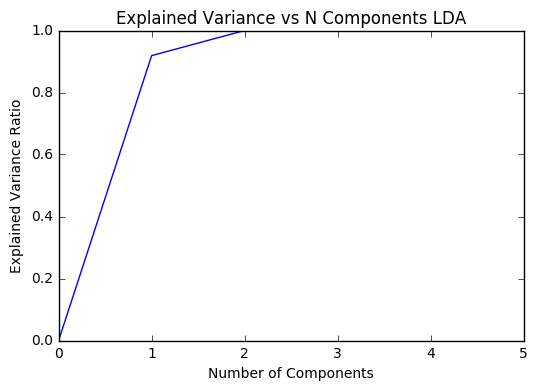

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
explained_lda=[]
for i in range(6):
    print i
    lda = LinearDiscriminantAnalysis(n_components=i)
    lda.fit(ens_train[ft_ens],ens_train[out]).transform(ens_train[ft_ens])
    explained_lda.append(np.sum(lda.explained_variance_ratio_))



plt.figure()
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.plot(range(0,6),explained_lda)
plt.title('Explained Variance vs N Components LDA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

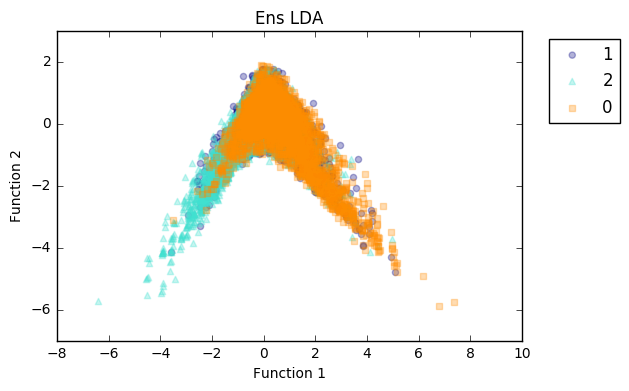

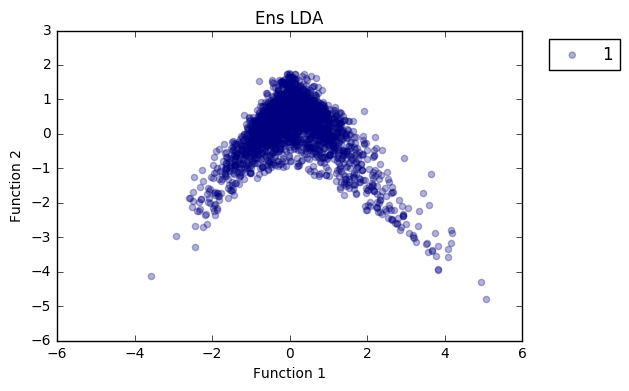

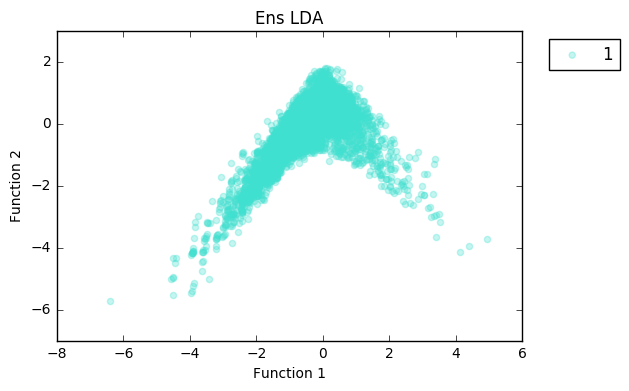

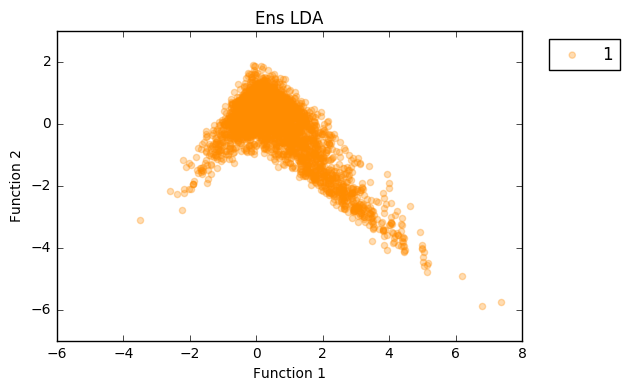

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(ens_train[ft_ens],ens_train[out]).transform(ens_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['navy'], [ 0], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['turquoise'], [1], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['darkorange'], [ 2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

0
1
2
3
4
5
6
7
8


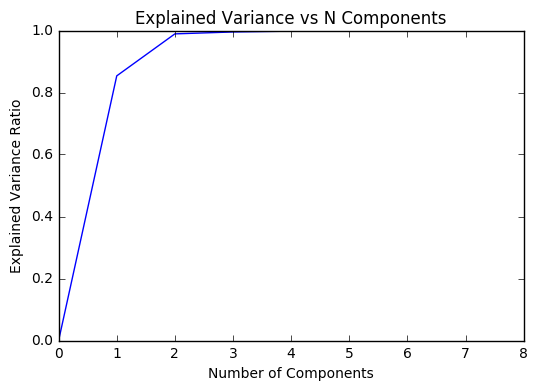

In [14]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
explained=[]
for i in range(len(ft_ens)):
    print i
    pca = PCA(n_components=i)
    pca.fit(ens_train[ft_ens]).transform(ens_train[ft_ens])
    explained.append(np.sum(pca.explained_variance_ratio_))



plt.figure()
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.plot(range(0,len(ft_ens)),explained)
plt.title('Explained Variance vs N Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


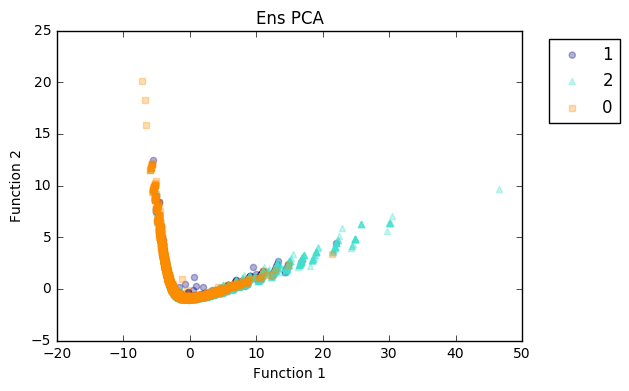

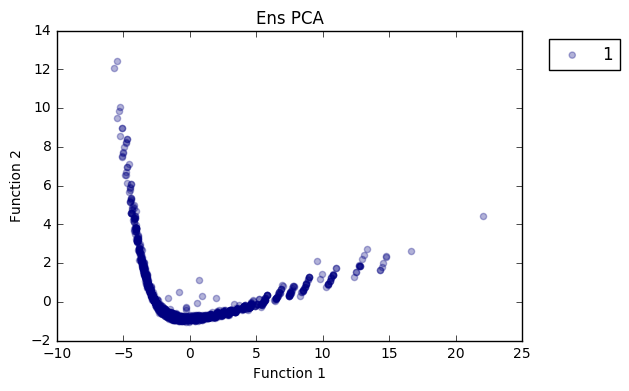

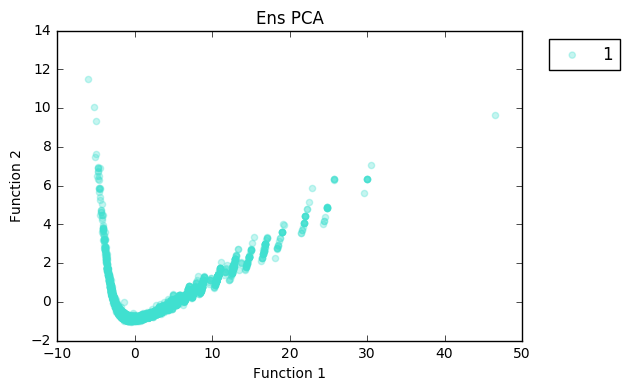

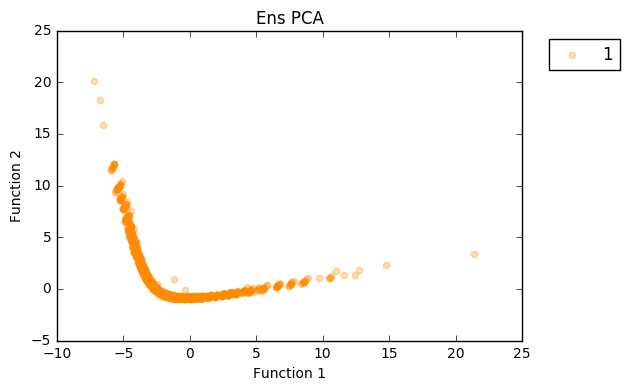

In [15]:
pca = PCA(n_components=2)
X_r2= pca.fit(ens_train[ft_ens]).transform(ens_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['navy'], [ 0], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['turquoise'], [1], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['darkorange'], [ 2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

In [16]:
from sklearn import linear_model
from sklearn.metrics import f1_score


lda_train = lda.transform(ens_train[ft_ens])
lda_val = lda.transform(ens_val[ft_ens])
lda_test = lda.transform(ens_test[ft_ens])
C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag']
n = range(100,1000,50)
lr= [0.0001, 0.001, 0.01, 0.1]


def pca_logreg_validation(C,solver,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for s in solver:
        for cv in C:
            print s,cv
            lg = linear_model.LogisticRegression(C=cv,solver=s,n_jobs=-1,max_iter=100000)
            lg.fit(train,train_y)
            score = f1_score(val_y, lg.predict(val),average='weighted')
            if score>sc_max:
                best=lg
                sc_max=score
    return best
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def pca_rf_validation(n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n,n_jobs=-1)
        rf.fit(train,train_y)
        score = f1_score(val_y, rf.predict(val),average='weighted')
        if score>sc_max:
            best=rf
            sc_max=score
    return best

n = range(100,1000,50)

#rf= rf_validation(n,train,val,ft,out)


#Função Naive Bayes
from sklearn.naive_bayes import GaussianNB

def pca_nb_validation(train,val,train_y,val_y):
    nb = GaussianNB()
    nb.fit(train,train_y)
    return nb


#Gradient Boosting
def pca_gb_validation(learning_rate,n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        for lr in learning_rate:
            gb = GradientBoostingClassifier(learning_rate=lr,n_estimators=n)
            gb.fit(train,train_y)
            score = f1_score(val_y, gb.predict(val),average='weighted')
            if score>sc_max:
                best=gb
                sc_max=score
    return best

lr= [0.0001, 0.001, 0.01, 0.1]

logreg_lda=pca_logreg_validation(C,solver,lda_train,lda_val,ens_train['Output'],ens_val['Output'])
print "NB"
nb_lda= pca_nb_validation(lda_train,lda_val,ens_train['Output'],ens_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda= pca_rf_validation(n,lda_train,lda_val,ens_train['Output'],ens_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda= pca_gb_validation(lr,n,lda_train,lda_val,ens_train['Output'],ens_val['Output'])

newton-cg 0.001
newton-cg 0.01


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [17]:
#GaussianProcess
ynaive = [ens_train['Output'].mode()[0]]*len(test)
naive = f1_score(ens_test[out],ynaive,average='weighted')
#print "logreg_lda
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(ens_test[out],ynaive,average='macro'),f1_score(ens_test[out],ynaive,average='micro')
print "LogReg     ", f1_score(ens_test[out],logreg_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],logreg_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],logreg_lda.predict(lda_test),average='micro')
print "Naive Bayes", f1_score(ens_test[out],nb_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],nb_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],nb_lda.predict(lda_test),average='micro')
print "Random F.  ", f1_score(ens_test[out],rf_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],rf_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],rf_lda.predict(lda_test),average='micro')
print "G. Boost.  ", f1_score(ens_test[out],gb_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],gb_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],gb_lda.predict(lda_test),average='micro')

		F1Score	      F1 macro	    F1 micro
Naive       0.274881660519 0.205550071295 0.445765937203
LogReg      0.431985107815 0.374746507403 0.520456707897
Naive Bayes 0.462819700388 0.421066441393 0.505708848716
Random F.   0.445744190357 0.410558954451 0.462416745956
G. Boost.   0.447301615996 0.398638774013 0.506660323501


In [47]:
ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A','B365H','B365D','B365A']

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(ens_train[ft_ens],ens_train[out]).transform(ens_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


from sklearn import linear_model
from sklearn.metrics import f1_score


lda_train = lda.transform(ens_train[ft_ens])
lda_val = lda.transform(ens_val[ft_ens])
lda_test = lda.transform(ens_test[ft_ens])
C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag']
n = range(100,1000,50)
lr= [0.0001, 0.001, 0.01, 0.1]


def pca_logreg_validation(C,solver,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for s in solver:
        for cv in C:
            print s,cv
            lg = linear_model.LogisticRegression(C=cv,solver=s,n_jobs=-1,max_iter=100000)
            lg.fit(train,train_y)
            score = f1_score(val_y, lg.predict(val),average='weighted')
            if score>sc_max:
                best=lg
                sc_max=score
    return best
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def pca_rf_validation(n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n,n_jobs=-1)
        rf.fit(train,train_y)
        score = f1_score(val_y, rf.predict(val),average='weighted')
        if score>sc_max:
            best=rf
            sc_max=score
    return best

n = range(100,1000,50)

#rf= rf_validation(n,train,val,ft,out)


#Função Naive Bayes
from sklearn.naive_bayes import GaussianNB

def pca_nb_validation(train,val,train_y,val_y):
    nb = GaussianNB()
    nb.fit(train,train_y)
    return nb


#Gradient Boosting
def pca_gb_validation(learning_rate,n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        for lr in learning_rate:
            gb = GradientBoostingClassifier(learning_rate=lr,n_estimators=n)
            gb.fit(train,train_y)
            score = f1_score(val_y, gb.predict(val),average='weighted')
            if score>sc_max:
                best=gb
                sc_max=score
    return best

lr= [0.0001, 0.001, 0.01, 0.1]

logreg_lda=pca_logreg_validation(C,solver,lda_train,lda_val,ens_train['Output'],ens_val['Output'])
print "NB"
nb_lda= pca_nb_validation(lda_train,lda_val,ens_train['Output'],ens_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda= pca_rf_validation(n,lda_train,lda_val,ens_train['Output'],ens_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda= pca_gb_validation(lr,n,lda_train,lda_val,ens_train['Output'],ens_val['Output'])

#GaussianProcess
ynaive = [ens_train['Output'].mode()[0]]*len(test)
naive = f1_score(ens_test[out],ynaive,average='weighted')
#print "logreg_lda
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(ens_test[out],ynaive,average='macro'),f1_score(ens_test[out],ynaive,average='micro')
print "LogReg     ", f1_score(ens_test[out],logreg_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],logreg_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],logreg_lda.predict(lda_test),average='micro')
print "Naive Bayes", f1_score(ens_test[out],nb_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],nb_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],nb_lda.predict(lda_test),average='micro')
print "Random F.  ", f1_score(ens_test[out],rf_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],rf_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],rf_lda.predict(lda_test),average='micro')
print "G. Boost.  ", f1_score(ens_test[out],gb_lda.predict(lda_test),average='weighted'),f1_score(ens_test[out],gb_lda.predict(lda_test),average='macro'),f1_score(ens_test[out],gb_lda.predict(lda_test),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
		F1Score	      F1 macro	    F1 micro
Naive       0.274881660519 0.205550071295 0.445765937203
LogReg      0.433109789604 0.376272442763 0.520456707897
Naive Bayes 0.466154260691 0.425580274063 0.502854424358
Random F.   0.457526328054 0.426041984144 0.471455756422
G. Boost.   0.44720792819 0.397213486724 0.512369172217


In [51]:
pca = PCA(n_components=2)
pca.fit(ens_train[ft_ens]).transform(ens_train[ft_ens])

pca_train = pca.transform(ens_train[ft_ens])
pca_val = pca.transform(ens_val[ft_ens])
pca_test = pca.transform(ens_test[ft_ens])

logreg_pca=pca_logreg_validation(C,solver,pca_train,pca_val,ens_train['Output'],ens_val['Output'])
print "NB"
nb_pca= pca_nb_validation(pca_train,pca_val,ens_train['Output'],ens_val['Output'])
print "RF"
n = range(100,1000,50)
rf_pca= pca_rf_validation(n,pca_train,pca_val,ens_train['Output'],ens_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_pca= pca_gb_validation(lr,n,pca_train,pca_val,ens_train['Output'],ens_val['Output'])

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [52]:
#GaussianProcess
ynaive = [ens_train['Output'].mode()[0]]*len(test)
naive = f1_score(ens_test[out],ynaive,average='weighted')
#print "logreg_pca
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(ens_test[out],ynaive,average='macro'),f1_score(ens_test[out],ynaive,average='micro')
print "LogReg     ", f1_score(ens_test[out],logreg_pca.predict(pca_test),average='weighted'),f1_score(ens_test[out],logreg_pca.predict(pca_test),average='macro'),f1_score(ens_test[out],logreg_pca.predict(pca_test),average='micro')
print "Naive Bayes", f1_score(ens_test[out],nb_pca.predict(pca_test),average='weighted'),f1_score(ens_test[out],nb_pca.predict(pca_test),average='macro'),f1_score(ens_test[out],nb_pca.predict(pca_test),average='micro')
print "Random F.  ", f1_score(ens_test[out],rf_pca.predict(pca_test),average='weighted'),f1_score(ens_test[out],rf_pca.predict(pca_test),average='macro'),f1_score(ens_test[out],rf_pca.predict(pca_test),average='micro')
print "G. Boost.  ", f1_score(ens_test[out],gb_pca.predict(pca_test),average='weighted'),f1_score(ens_test[out],gb_pca.predict(pca_test),average='macro'),f1_score(ens_test[out],gb_pca.predict(pca_test),average='micro')

		F1Score	      F1 macro	    F1 micro
Naive       0.274881660519 0.205550071295 0.445765937203
LogReg      0.441553092331 0.385056632833 0.526165556613
Naive Bayes 0.410852855626 0.351853938269 0.512369172217
Random F.   0.44463017155 0.410462253209 0.459562321598
G. Boost.   0.453260525908 0.407316346511 0.501902949572


In [20]:
logreg=pca_logreg_validation(C,solver,ens_train[ft_ens],ens_val[ft_ens],ens_train['Output'],ens_val['Output'])
print "NB"
nb= pca_nb_validation(ens_train[ft_ens],ens_val[ft_ens],ens_train['Output'],ens_val['Output'])
print "RF"
n = range(100,1000,50)
rf= pca_rf_validation(n,ens_train[ft_ens],ens_val[ft_ens],ens_train['Output'],ens_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb= pca_gb_validation(lr,n,ens_train[ft_ens],ens_val[ft_ens],ens_train['Output'],ens_val['Output'])
print "Fim"

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim


In [70]:
ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A','B365A','B365H','B365D']


		F1Score	      F1 macro	    F1 micro
Naive       0.274881660519 0.205550071295 0.445765937203
LogReg      0.437954423809 0.381147231751 0.526165556613
Naive Bayes 0.467510817972 0.444941148732 0.460513796384
Random F.   0.473727948216 0.432473307298 0.509039010466
G. Boost.   0.464208199304 0.416929338579 0.521408182683


In [23]:
sf_train = pysql("Select * from ens_train where B365H<= 1.5 or B365A<=1.5")
sf_val = pysql("Select * from ens_val where B365H<= 1.5 or B365A<=1.5")
sf_test = pysql("Select * from ens_test where B365H<= 1.5 or B365A<=1.5")

f_train = pysql("Select * from ens_train where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
f_test = pysql("Select * from ens_test where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
f_val = pysql("Select * from ens_val where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")

eq_train = pysql("Select * from ens_train where B365H>=2.22 and B365A>=2.22")
eq_test = pysql("Select * from ens_test where B365H>=2.22 and B365A>=2.22")
eq_val = pysql("Select * from ens_val where B365H>=2.22 and B365A>=2.22")




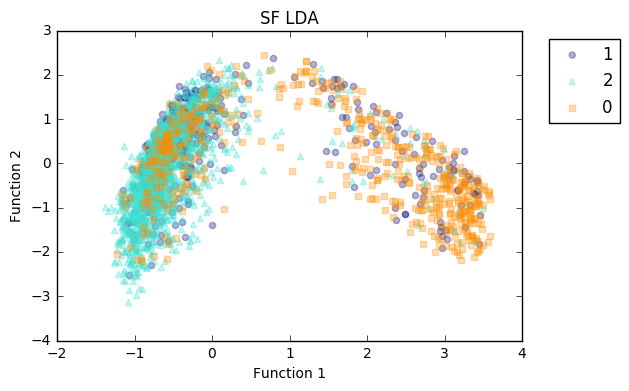

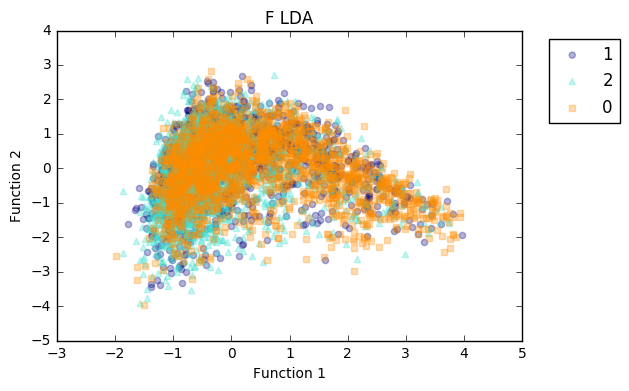

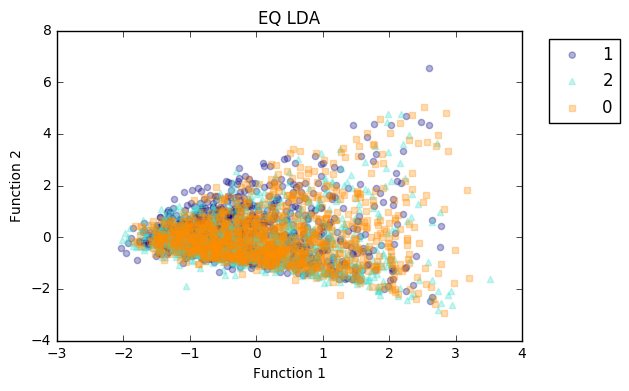

In [43]:
lda_sf = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda_sf.fit(sf_train[ft_ens],sf_train[out]).transform(sf_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
sf_train_lda = lda_sf.transform(sf_train[ft_ens])
sf_test_lda = lda_sf.transform(sf_test[ft_ens])
sf_val_lda = lda_sf.transform(sf_val[ft_ens])


plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[sf_train['Output'] == i, 0],X_r2[sf_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('SF LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

lda_f = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda_f.fit(f_train[ft_ens],f_train[out]).transform(f_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

f_train_lda = lda_f.transform(f_train[ft_ens])
f_test_lda = lda_f.transform(f_test[ft_ens])
f_val_lda = lda_f.transform(f_val[ft_ens])



plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[f_train['Output'] == i, 0],X_r2[f_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('F LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

lda_eq = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda_eq.fit(eq_train[ft_ens],eq_train[out]).transform(eq_train[ft_ens])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

eq_train_lda = lda_eq.transform(eq_train[ft_ens])
eq_test_lda = lda_eq.transform(eq_test[ft_ens])
eq_val_lda = lda_eq.transform(eq_val[ft_ens])
plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[eq_train['Output'] == i, 0],X_r2[eq_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('EQ LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()




In [49]:
sf_logreg=pca_logreg_validation(C,solver,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
print "NB"
sf_nb= pca_nb_validation(sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
print "RF"
n = range(100,1000,50)
sf_rf= pca_rf_validation(n,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
sf_gb= pca_gb_validation(lr,n,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [sf_train['Output'].mode()[0]]*len(sf_test)
naive = f1_score(sf_test['Output'],ynaive,average='weighted')
print "SF LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(sf_test['Output'],ynaive,average='macro'),f1_score(sf_test['Output'],ynaive,average='micro')
print "LogReg     ", f1_score(sf_test['Output'],sf_logreg.predict(sf_test_lda),average='weighted'),f1_score(sf_test['Output'],sf_logreg.predict(sf_test_lda),average='macro'),f1_score(sf_test['Output'],sf_logreg.predict(sf_test_lda),average='micro')
print "Naive Bayes", f1_score(sf_test['Output'],sf_nb.predict(sf_test_lda),average='weighted'),f1_score(sf_test['Output'],sf_nb.predict(sf_test_lda),average='macro'),f1_score(sf_test['Output'],sf_nb.predict(sf_test_lda),average='micro')
print "Random F.  ", f1_score(sf_test['Output'],sf_rf.predict(sf_test_lda),average='weighted'),f1_score(sf_test['Output'],sf_rf.predict(sf_test_lda),average='macro'),f1_score(sf_test['Output'],sf_rf.predict(sf_test_lda),average='micro')
print "G. Boost.  ", f1_score(sf_test['Output'],sf_gb.predict(sf_test_lda),average='weighted'),f1_score(sf_test['Output'],sf_gb.predict(sf_test_lda),average='macro'),f1_score(sf_test['Output'],sf_gb.predict(sf_test_lda),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
SF LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.456427955134 0.251366120219 0.605263157895
LogReg      0.696513247827 0.539662814299 0.763157894737
Naive Bayes 0.69964398923 0.54974162041 0.754385964912
Random F.   0.66346224956 0.527546133878 0.695175438596
G. Boost.   0.680976503248 0.52532576078 0.736842105263


In [50]:
f_logreg=pca_logreg_validation(C,solver,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
print "NB"
f_nb= pca_nb_validation(f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
print "RF"
n = range(100,1000,50)
f_rf= pca_rf_validation(n,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
f_gb= pca_gb_validation(lr,n,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [f_train['Output'].mode()[0]]*len(f_test)
naive = f1_score(f_test['Output'],ynaive,average='weighted')
print "F LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(f_test['Output'],ynaive,average='macro'),f1_score(f_test['Output'],ynaive,average='micro')
print "LogReg     ", f1_score(f_test['Output'],f_logreg.predict(f_test_lda),average='weighted'),f1_score(f_test['Output'],f_logreg.predict(f_test_lda),average='macro'),f1_score(f_test['Output'],f_logreg.predict(f_test_lda),average='micro')
print "Naive Bayes", f1_score(f_test['Output'],f_nb.predict(f_test_lda),average='weighted'),f1_score(f_test['Output'],f_nb.predict(f_test_lda),average='macro'),f1_score(f_test['Output'],f_nb.predict(f_test_lda),average='micro')
print "Random F.  ", f1_score(f_test['Output'],f_rf.predict(f_test_lda),average='weighted'),f1_score(f_test['Output'],f_rf.predict(f_test_lda),average='macro'),f1_score(f_test['Output'],f_rf.predict(f_test_lda),average='micro')
print "G. Boost.  ", f1_score(f_test['Output'],f_gb.predict(f_test_lda),average='weighted'),f1_score(f_test['Output'],f_gb.predict(f_test_lda),average='macro'),f1_score(f_test['Output'],f_gb.predict(f_test_lda),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
F LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.268692610816 0.203642747422 0.43981042654
LogReg      0.390595585545 0.336723163842 0.482464454976
Naive Bayes 0.385303535336 0.331164008229 0.480568720379
Random F.   0.385322394885 0.357375165556 0.397156398104
G. Boost.   0.404655958627 0.365827859271 0.442654028436


In [51]:
eq_logreg=pca_logreg_validation(C,solver,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
print "NB"
eq_nb= pca_nb_validation(eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
print "RF"
n = range(100,1000,50)
eq_rf= pca_rf_validation(n,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
eq_gb= pca_gb_validation(lr,n,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [eq_train['Output'].mode()[0]]*len(eq_test)
naive = f1_score(eq_test['Output'],ynaive,average='weighted')
print "SF LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(eq_test['Output'],ynaive,average='macro'),f1_score(eq_test['Output'],ynaive,average='micro')
print "LogReg     ", f1_score(eq_test['Output'],eq_logreg.predict(eq_test_lda),average='weighted'),f1_score(eq_test['Output'],eq_logreg.predict(eq_test_lda),average='macro'),f1_score(eq_test['Output'],eq_logreg.predict(eq_test_lda),average='micro')
print "Naive Bayes", f1_score(eq_test['Output'],eq_nb.predict(eq_test_lda),average='weighted'),f1_score(eq_test['Output'],eq_nb.predict(eq_test_lda),average='macro'),f1_score(eq_test['Output'],eq_nb.predict(eq_test_lda),average='micro')
print "Random F.  ", f1_score(eq_test['Output'],eq_rf.predict(eq_test_lda),average='weighted'),f1_score(eq_test['Output'],eq_rf.predict(eq_test_lda),average='macro'),f1_score(eq_test['Output'],eq_rf.predict(eq_test_lda),average='micro')
print "G. Boost.  ", f1_score(eq_test['Output'],eq_gb.predict(eq_test_lda),average='weighted'),f1_score(eq_test['Output'],eq_gb.predict(eq_test_lda),average='macro'),f1_score(eq_test['Output'],eq_gb.predict(eq_test_lda),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
SF LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.166666666667 0.166666666667 0.333333333333
LogReg      0.370620321324 0.369406868144 0.416243654822
Naive Bayes 0.340880904446 0.339283459147 0.397631133672
Random F.   0.318475338746 0.318025953123 0.321489001692
G. Boost.   0.358430521799 0.357846954129 0.363790186125


In [52]:
import warnings
warnings.filterwarnings("ignore")
filter_pr=[]
for index,row in ens_test.iterrows():
    if row['B365H']<= 1.5 or row['B365A']<= 1.5:
        r = lda_sf.transform(row[ft_ens])
        filter_pr.append(sf_nb.predict(r))
    elif row['B365H']<= 2.2 or row['B365A']<= 2.2:
        r = lda_f.transform(row[ft_ens])
        filter_pr.append(f_gb.predict(r))
    else:
        r = lda_eq.transform(row[ft_ens])
        filter_pr.append(eq_logreg.predict(r))

print "Filter"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Filter.  ", f1_score(ens_test['Output'],filter_pr,average='weighted'),f1_score(ens_test['Output'],filter_pr,average='macro'),f1_score(ens_test['Output'],filter_pr,average='micro')

Filter
		F1Score	      F1 macro	    F1 micro
Filter.   0.456387113837 0.412924793183 0.502854424358


In [53]:
sf_nlda_logreg=pca_logreg_validation(C,solver,sf_train[ft_ens],sf_val[ft_ens],sf_train['Output'],sf_val['Output'])
print "NB"
sf_nlda_nb= pca_nb_validation(sf_train[ft_ens],sf_val[ft_ens],sf_train['Output'],sf_val['Output'])
print "RF"
n = range(100,1000,50)
sf_nlda_rf= pca_rf_validation(n,sf_train[ft_ens],sf_val[ft_ens],sf_train['Output'],sf_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
sf_nlda_gb= pca_gb_validation(lr,n,sf_train[ft_ens],sf_val[ft_ens],sf_train['Output'],sf_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [sf_train['Output'].mode()[0]]*len(sf_test)
naive = f1_score(sf_test['Output'],ynaive,average='weighted')
print "SF LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(sf_test['Output'],ynaive,average='macro'),f1_score(sf_test['Output'],ynaive,average='micro')
print "sf_nlda_logreg     ", f1_score(sf_test['Output'],sf_nlda_logreg.predict(sf_test[ft_ens]),average='weighted'),f1_score(sf_test['Output'],sf_nlda_logreg.predict(sf_test[ft_ens]),average='macro'),f1_score(sf_test['Output'],sf_nlda_logreg.predict(sf_test[ft_ens]),average='micro')
print "Naive Bayes", f1_score(sf_test['Output'],sf_nlda_nb.predict(sf_test[ft_ens]),average='weighted'),f1_score(sf_test['Output'],sf_nlda_nb.predict(sf_test[ft_ens]),average='macro'),f1_score(sf_test['Output'],sf_nlda_nb.predict(sf_test[ft_ens]),average='micro')
print "Random F.  ", f1_score(sf_test['Output'],sf_nlda_rf.predict(sf_test[ft_ens]),average='weighted'),f1_score(sf_test['Output'],sf_nlda_rf.predict(sf_test[ft_ens]),average='macro'),f1_score(sf_test['Output'],sf_nlda_rf.predict(sf_test[ft_ens]),average='micro')
print "G. Boost.  ", f1_score(sf_test['Output'],sf_nlda_gb.predict(sf_test[ft_ens]),average='weighted'),f1_score(sf_test['Output'],sf_nlda_gb.predict(sf_test[ft_ens]),average='macro'),f1_score(sf_test['Output'],sf_nlda_gb.predict(sf_test[ft_ens]),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
SF LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.456427955134 0.251366120219 0.605263157895
sf_nlda_logreg      0.692193994234 0.535709017965 0.758771929825
Naive Bayes 0.693803642562 0.554822161949 0.736842105263
Random F.   0.677330026922 0.524018153587 0.728070175439
G. Boost.   0.7045448693 0.570935227574 0.743421052632


In [54]:
f_nlda_logreg=pca_logreg_validation(C,solver,f_train[ft_ens],f_val[ft_ens],f_train['Output'],f_val['Output'])
print "NB"
f_nlda_nb= pca_nb_validation(f_train[ft_ens],f_val[ft_ens],f_train['Output'],f_val['Output'])
print "RF"
n = range(100,1000,50)
f_nlda_rf= pca_rf_validation(n,f_train[ft_ens],f_val[ft_ens],f_train['Output'],f_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
f_nlda_gb= pca_gb_validation(lr,n,f_train[ft_ens],f_val[ft_ens],f_train['Output'],f_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [f_train['Output'].mode()[0]]*len(f_test)
naive = f1_score(f_test['Output'],ynaive,average='weighted')
print "SF LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(f_test['Output'],ynaive,average='macro'),f1_score(f_test['Output'],ynaive,average='micro')
print "f_nlda_logreg     ", f1_score(f_test['Output'],f_nlda_logreg.predict(f_test[ft_ens]),average='weighted'),f1_score(f_test['Output'],f_nlda_logreg.predict(f_test[ft_ens]),average='macro'),f1_score(f_test['Output'],f_nlda_logreg.predict(f_test[ft_ens]),average='micro')
print "Naive Bayes", f1_score(f_test['Output'],f_nlda_nb.predict(f_test[ft_ens]),average='weighted'),f1_score(f_test['Output'],f_nlda_nb.predict(f_test[ft_ens]),average='macro'),f1_score(f_test['Output'],f_nlda_nb.predict(f_test[ft_ens]),average='micro')
print "Random F.  ", f1_score(f_test['Output'],f_nlda_rf.predict(f_test[ft_ens]),average='weighted'),f1_score(f_test['Output'],f_nlda_rf.predict(f_test[ft_ens]),average='macro'),f1_score(f_test['Output'],f_nlda_rf.predict(f_test[ft_ens]),average='micro')
print "G. Boost.  ", f1_score(f_test['Output'],f_nlda_gb.predict(f_test[ft_ens]),average='weighted'),f1_score(f_test['Output'],f_nlda_gb.predict(f_test[ft_ens]),average='macro'),f1_score(f_test['Output'],f_nlda_gb.predict(f_test[ft_ens]),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
SF LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.268692610816 0.203642747422 0.43981042654
f_nlda_logreg      0.393191214885 0.339876999612 0.483412322275
Naive Bayes 0.399038019305 0.349193959111 0.470142180095
Random F.   0.417916948776 0.379969382872 0.452132701422
G. Boost.   0.400006976364 0.358331576132 0.452132701422


In [55]:
eq_nlda_logreg=pca_logreg_validation(C,solver,eq_train[ft_ens],eq_val[ft_ens],eq_train['Output'],eq_val['Output'])
print "NB"
eq_nlda_nb= pca_nb_validation(eq_train[ft_ens],eq_val[ft_ens],eq_train['Output'],eq_val['Output'])
print "RF"
n = range(100,1000,50)
eq_nlda_rf= pca_rf_validation(n,eq_train[ft_ens],eq_val[ft_ens],eq_train['Output'],eq_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
eq_nlda_gb= pca_gb_validation(lr,n,eq_train[ft_ens],eq_val[ft_ens],eq_train['Output'],eq_val['Output'])
print "Fim"
#GaussianProcess
ynaive = [eq_train['Output'].mode()[0]]*len(eq_test)
naive = f1_score(eq_test['Output'],ynaive,average='weighted')
print "SF LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(eq_test['Output'],ynaive,average='macro'),f1_score(eq_test['Output'],ynaive,average='micro')
print "eq_nlda_logreg     ", f1_score(eq_test['Output'],eq_nlda_logreg.predict(eq_test[ft_ens]),average='weighted'),f1_score(eq_test['Output'],eq_nlda_logreg.predict(eq_test[ft_ens]),average='macro'),f1_score(eq_test['Output'],eq_nlda_logreg.predict(eq_test[ft_ens]),average='micro')
print "Naive Bayes", f1_score(eq_test['Output'],eq_nlda_nb.predict(eq_test[ft_ens]),average='weighted'),f1_score(eq_test['Output'],eq_nlda_nb.predict(eq_test[ft_ens]),average='macro'),f1_score(eq_test['Output'],eq_nlda_nb.predict(eq_test[ft_ens]),average='micro')
print "Random F.  ", f1_score(eq_test['Output'],eq_nlda_rf.predict(eq_test[ft_ens]),average='weighted'),f1_score(eq_test['Output'],eq_nlda_rf.predict(eq_test[ft_ens]),average='macro'),f1_score(eq_test['Output'],eq_nlda_rf.predict(eq_test[ft_ens]),average='micro')
print "G. Boost.  ", f1_score(eq_test['Output'],eq_nlda_gb.predict(eq_test[ft_ens]),average='weighted'),f1_score(eq_test['Output'],eq_nlda_gb.predict(eq_test[ft_ens]),average='macro'),f1_score(eq_test['Output'],eq_nlda_gb.predict(eq_test[ft_ens]),average='micro')

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB
Fim
SF LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.166666666667 0.166666666667 0.333333333333
eq_nlda_logreg      0.377969540721 0.376827000019 0.421319796954
Naive Bayes 0.418498093228 0.417986634398 0.44331641286
Random F.   0.398331971004 0.398190078219 0.402707275804
G. Boost.   0.397948439387 0.397609533561 0.402707275804


In [56]:
import warnings
warnings.filterwarnings("ignore")
filter_pr=[]
for index,row in ens_test.iterrows():
    if row['B365H']<= 1.5 or row['B365A']<= 1.5:
        filter_pr.append(sf_nlda_gb.predict(row[ft_ens]))
    elif row['B365H']<= 2.2 or row['B365A']<= 2.2:
        filter_pr.append(sf_nlda_rf.predict(row[ft_ens]))
    else:
        filter_pr.append(sf_nlda_nb.predict(row[ft_ens]))

print "Filter"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Filter.  ", f1_score(ens_test['Output'],filter_pr,average='weighted'),f1_score(ens_test['Output'],filter_pr,average='macro'),f1_score(ens_test['Output'],filter_pr,average='micro')

Filter
		F1Score	      F1 macro	    F1 micro
Filter.   0.437852709847 0.396062179401 0.475261655566


In [64]:
from sklearn.feature_selection import SelectKBest, chi2
ft_ens=['nb_D','nb_H','nb_A','gb_D','gb_H','gb_A','filter_D','filter_H','filter_A','B365H','B365D','B365A']
ft_rank,pvalue = chi2(ens_train[ft_ens],ens_train['Output'])

rank={}
i=0
ft_chi=[]
for v in ft_rank:
    if v>=100:
        rank[i]=v
        
    i=i+1

import operator

sorted_x = sorted(rank.items(), key=operator.itemgetter(1),reverse=True)
selected_ft=[]
for key,value in sorted_x:
    selected_ft.append(ft_ens[key])
    print ft_ens[key],value,pvalue[key]
    
    

B365A 3826.89364145 0.0
B365H 1687.64607087 0.0
nb_A 163.511548054 3.11830417695e-36
gb_A 154.24205616 3.21190777084e-34
B365D 144.009813946 5.35385039801e-32
gb_H 116.580897237 4.83926959516e-26
nb_H 107.448498148 4.65430760779e-24


0
1
2
3
4
5
6


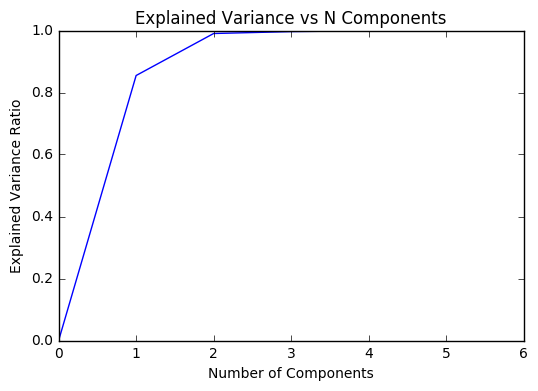

In [68]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
explained=[]
for i in range(len(selected_ft)):
    print i
    pca = PCA(n_components=i)
    pca.fit(ens_train[selected_ft]).transform(ens_train[selected_ft])
    explained.append(np.sum(pca.explained_variance_ratio_))



plt.figure()
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.plot(range(0,len(selected_ft)),explained)
plt.title('Explained Variance vs N Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

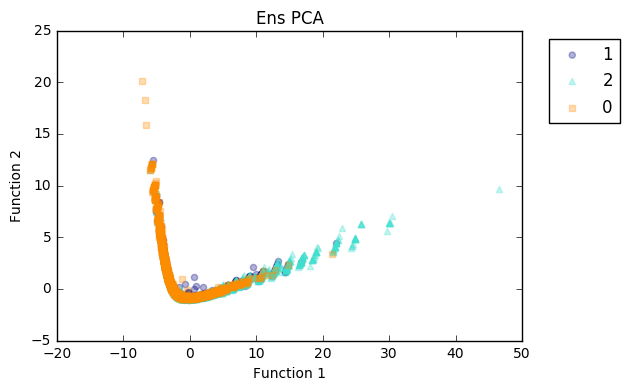

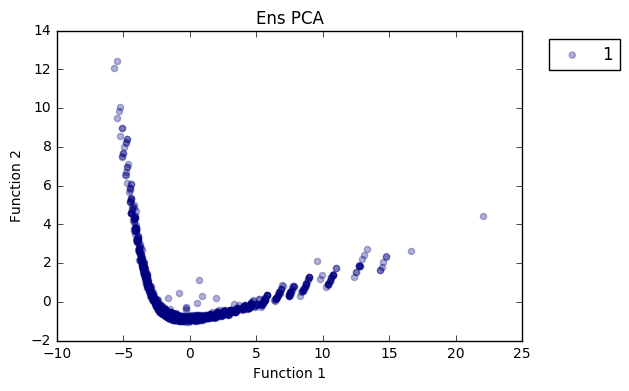

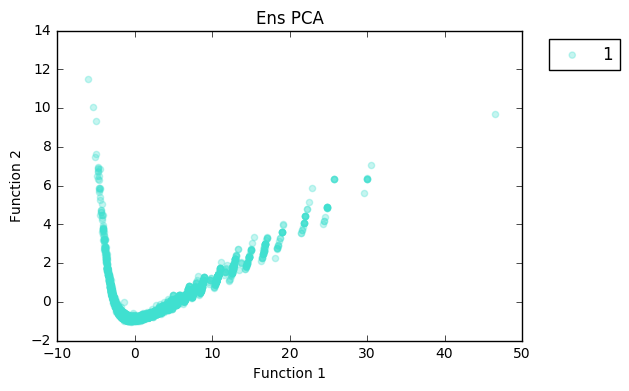

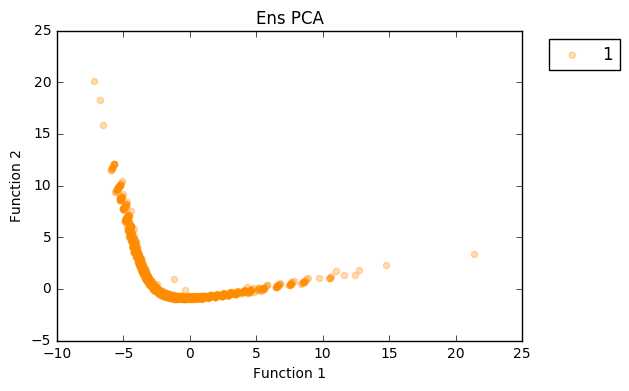

In [69]:
pca = PCA(n_components=2)
X_r2= pca.fit(ens_train[selected_ft]).transform(ens_train[selected_ft])
target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1,2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['navy'], [ 0], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['turquoise'], [1], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

plt.figure()

for color, i, target_name,m in zip(['darkorange'], [ 2], target_names,["o","^","s"]):
    plt.scatter(X_r2[ens_train['Output'] == i, 0],X_r2[ens_train['Output'] == i, 1],alpha=.3, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Ens PCA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()